# Part II - Questions about Common Loan Statistics
## by Jasmine W.

## Investigation Overview




There are many common statistics about loans. The following three questions pertain to three common loan statistics:

**_1. Which people tend to have fully paid off their loans: people with higher income or lower income?_**

**_2. Do people with lower credit scores tend to have higher fees for late payment?_**

**_3. Do people with loans that are past due more than 120 days have the lowest credit score?_**

This presentation will be using the data from the **prosperLoanData.csv** file to _either support or oppose_ these questions.

## Dataset Overview and Executive Summary



The dataset holds data about 113,937 loans from a company called _Prosper_. This includes the following loan information: **"Listing Key"**, **"Listing Number"**, **"Listing Creation Date"**, **"Credit Grade"**, **"Term"**, **"Loan Status"**, **"Closed Date"**, **"Borrower APR"**, **"Borrower Rate"**, **"Lender Yield"**, **"Estimated Effective Yield"**, **"Estimated Loss"**, **"Estimated Return"**, **"Prosper Rating (numeric)"**, **"Prosper Rating (Alpha)"**, **"Prosper Score"**, **"Listing Category (numeric)"**, **"Borrower State"**, **"Occupation"**, **"Employment Status"**, **"Employment Status Duration"**, **"Is Borrower Homeowner"**, **"Currently In Group"**, **"Group Key"**, **"Date Credit Pulled"**, **"Credit Score Range Lower"**, **"Credit Score Range Upper"**, **"First Recorded Credit Line"**, **"Current Credit Lines"**, **"Open Credit Lines"**, **"Total Credit Lines past 7 years"**, **"Open Revolving Accounts"**, **"Open Revolving Monthly Payment"**, **"Inquiries Last 6 Months"**, **"Total Inquiries"**, **"Current Delinquencies"**, **"Amount Delinquent"**, **"Delinquencies Last 7 Years"**, **"Public Records Last 10 Years"**, **"Public Records Last 12 Months"**, **"Revolving Credit Balance"**, **"Bankcard Utilization"**, **"Available Bankcard Credit"**, **"Total Trades"**, **"Trades Never Delinquent (percentage)"**, **"Trades Opened Last 6 Months"**, **"Debt To Income Ratio"**, **"Income Range"**, **"Income Verifiable"**, **"Stated Monthly Income"**, **"Loan Key"**, **"Total Prosper Loans"**, **"Total Prosper Payments Billed"**, **"On Time Prosper Payments"**, **"Prosper Payments Less Than One Month Late"**, **"Prosper Payments One Month Plus Late"**, **"Prosper Principal Borrowed"**, **"Prosper Principal Outstanding"**, **"Score x Change At Time Of Listing"**, **"Loan Current Days Delinquent"**, **"Loan First Defaulted Cycle Number"**, **"Loan Months Since Origination"**, **"Loan Number"**, **"Loan Original Amount"**, **"Loan Origination Date"**, **"Loan Origination Quarter"**, **"Member Key"**, **"Monthly Loan Payment"**, **"LP_Customer Payments"**, **"LP_Customer Principal Payments"**, **"LP_Interest and Fees"**, **"LP_Service Fees"**, **"LP_Collection Fees"**, **"LP_Gross Principal Loss"**, **"LP_Net Principal Loss"**, **"LP_NonPrincipal Recovery Payments"**, **"Percent Funded"**, **"Recommendations"**, **"Investment From Friends Count"**, **"Investment From Friends Amount"**, and **"Investors"**.

The _first visualization_ will display the data of the amount of occurrences for all the incomes of the completed loans to show whether people with higher or lower income tend to have fully paid off their loans. The _second visualization_ will display the amount of late payment for each credit score to show if people with lower credit scores tend to have higher fees for late payment. The _third visualization_ will display the amount of occurrences of each credit score in separate histograms for each type of loan status.

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
import zipfile

# opens zip file in read-mode
with zipfile.ZipFile("prosperLoanData.zip", "r") as zip_ref:
    
    # extracts all data in zip file
    zip_ref.extractall("prosperLoanData/")

# load in the dataset into a pandas dataframe
df_prosper_loan_data = pd.read_csv("prosperLoanData/prosperLoanData.csv")


# Code for cleaning data

# drops "CreditGrade" column
df_prosper_loan_data.drop(columns=["CreditGrade"], inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

# drops all rows with at least 1 null value in "LoanStatus", "StatedMonthlyIncome", "CreditScoreRangeLower", "CreditScoreRangeUpper", "AmountDelinquent", "IncomeVerifiable" columns
df_prosper_loan_data.dropna(subset=["LoanStatus", "StatedMonthlyIncome", "CreditScoreRangeLower", "CreditScoreRangeUpper", "AmountDelinquent", "IncomeVerifiable"], inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

# drops all rows with false values under "IncomeVerifiable" column
df_prosper_loan_data.drop(df_prosper_loan_data[df_prosper_loan_data["IncomeVerifiable"] == 'False'].index, inplace=True) # put condition directly into code for dropping rows with false values because "IncomeVerifiable" column is a BOOLEAN Column (MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED)

# multiples "StatedMonthlyIncome" column by 12 & puts results in new column called "YearlyIncome"
df_prosper_loan_data["YearlyIncome"] = df_prosper_loan_data["StatedMonthlyIncome"].mul(12)

# condition that checks if only Completed loans have Closed Dates
incomplete_loan_with_close_date_condition = df_prosper_loan_data[(df_prosper_loan_data["ClosedDate"].notna()) & (df_prosper_loan_data["LoanStatus"] != 'Completed')].index # used ".index" because condition will be used under "index" section in ".drop"

# drops rows that have Closed Dates when they are NOT Completed loans
df_prosper_loan_data.drop(incomplete_loan_with_close_date_condition, inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

# condition that checks if only Completed loans have Closed Dates
complete_loan_without_close_date_condition = df_prosper_loan_data[(df_prosper_loan_data["ClosedDate"].isnull()) & (df_prosper_loan_data["LoanStatus"] == 'Completed')].index # used ".index" because condition will be used under "index" section in ".drop"

# drops rows that have Closed Dates when they are NOT Completed loans
df_prosper_loan_data.drop(complete_loan_without_close_date_condition, inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

# finds median of "CreditScoreRangeLower" and "CreditScoreRangeUpper" columns & puts results in new column called "CreditScore"
df_prosper_loan_data["CreditScore"] = df_prosper_loan_data[["CreditScoreRangeLower", "CreditScoreRangeUpper"]].median(axis=1)

# condition that checks if credit scores are within 300-850
credit_score_range_condition = df_prosper_loan_data[(df_prosper_loan_data["CreditScore"] < 300) | (df_prosper_loan_data["CreditScore"] > 850)].index # used ".index" because condition will be used under "index" section in ".drop"

# drops rows that have Credit Scores that are NOT within 300-850
df_prosper_loan_data.drop(credit_score_range_condition, inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

# condition that checks if Loan Terms are either 24, 36, 48, 60, 72 or 84
loan_term_range_condition = df_prosper_loan_data[(df_prosper_loan_data["Term"] != 24) & (df_prosper_loan_data["Term"] != 36) & (df_prosper_loan_data["Term"] != 48) & (df_prosper_loan_data["Term"] != 60) & (df_prosper_loan_data["Term"] != 72) & (df_prosper_loan_data["Term"] != 84)].index # used ".index" because condition will be used under "index" section in ".drop"

# drops rows that have Loan Terms that are NOT either 24, 36, 48, 60, 72 or 84
df_prosper_loan_data.drop(loan_term_range_condition, inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

## (Visualization 1)



The first visualization answers the following question:

_1. Which people tend to have fully paid off their loans: people with higher income or lower income?_

by showing that **_the people with lower income tend to have their loans fully paid off_**.

Text(0.5, 1.0, 'Amount of Completed Loans among Yearly Incomes')

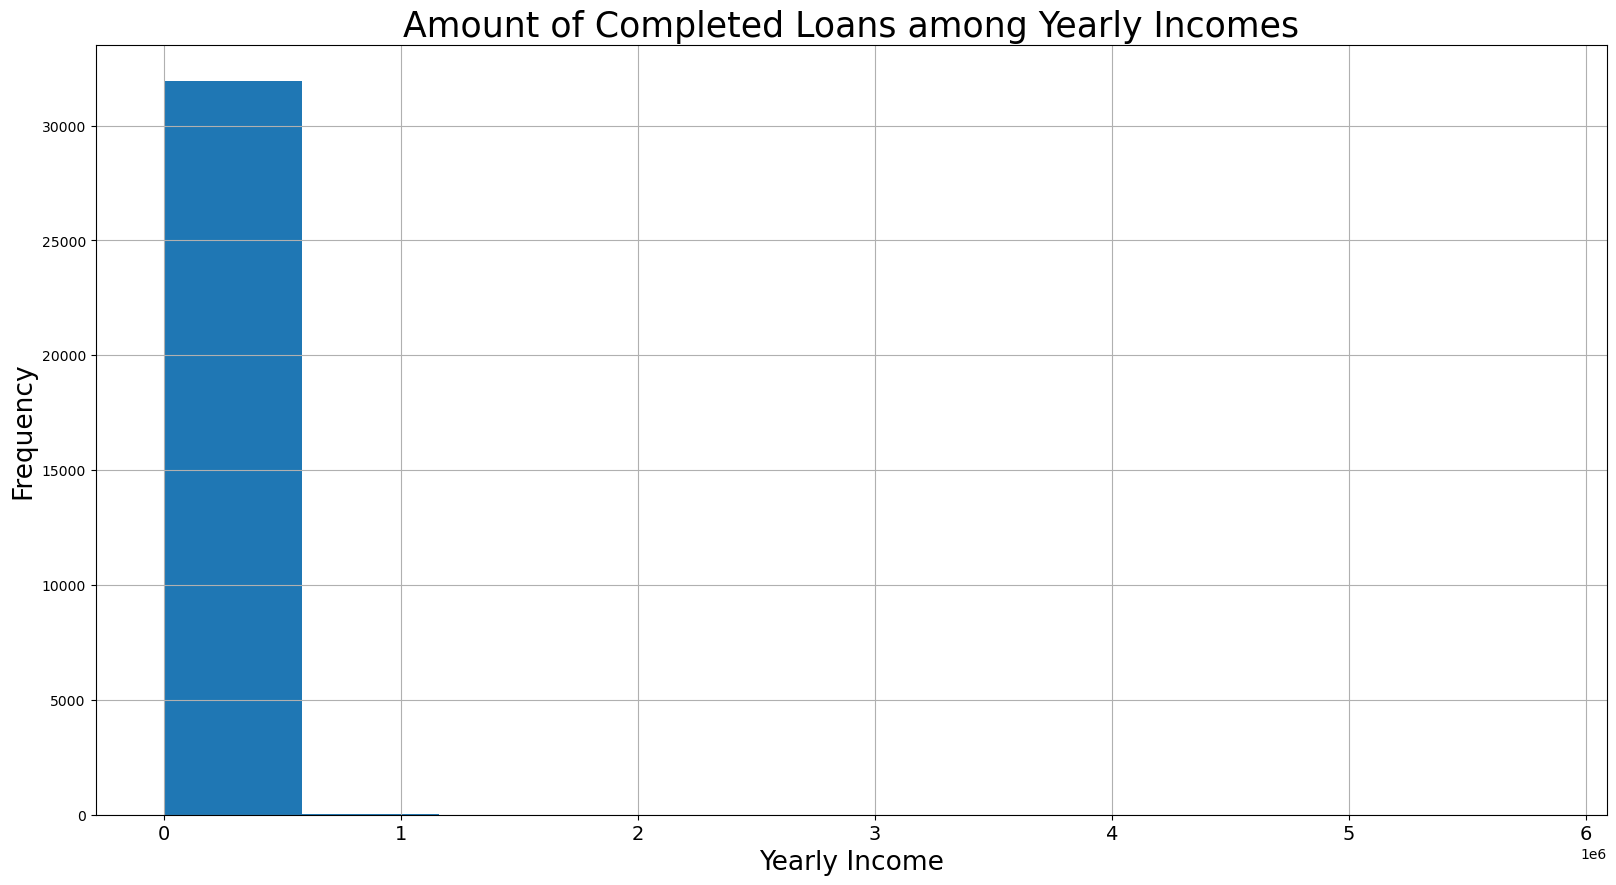

In [7]:
# Code for creating Histogram with amount of Completed Loans among Yearly Incomes

# creates dataframe with Completed loans ONLY
df_prosper_complete_loans_data = df_prosper_loan_data[df_prosper_loan_data["LoanStatus"] == 'Completed']

# creates dataframe with "LoanStatus" & "YearlyIncome" columns of Completed loans ONLY
df_prosper_complete_loans_and_yearly_incomes_data = df_prosper_complete_loans_data[["LoanStatus", "YearlyIncome"]]

# creates & displays Histogram
df_prosper_complete_loans_and_yearly_incomes_data.hist(xlabelsize=14, figsize=(19.5,10))

# adds x-axis label to Histogram
plt.xlabel('Yearly Income', fontsize=19)

# adds y-axis label to Histogram
plt.ylabel('Frequency', fontsize=19)

# adds title to Histogram
plt.title('Amount of Completed Loans among Yearly Incomes', fontsize=25)

## (Visualization 2)



The second visualization answers the following question:

_2. Do people with lower credit scores tend to have higher fees for late payment?_

by showing that **_the people with lower credit scores do not tend to have higher fees for late payment. Instead, the people with 
credit scores between 650-700 tend to have higher fees for late payment_**.

Text(0.5, 1.0, 'Delinquent Amounts over Credit Scores')

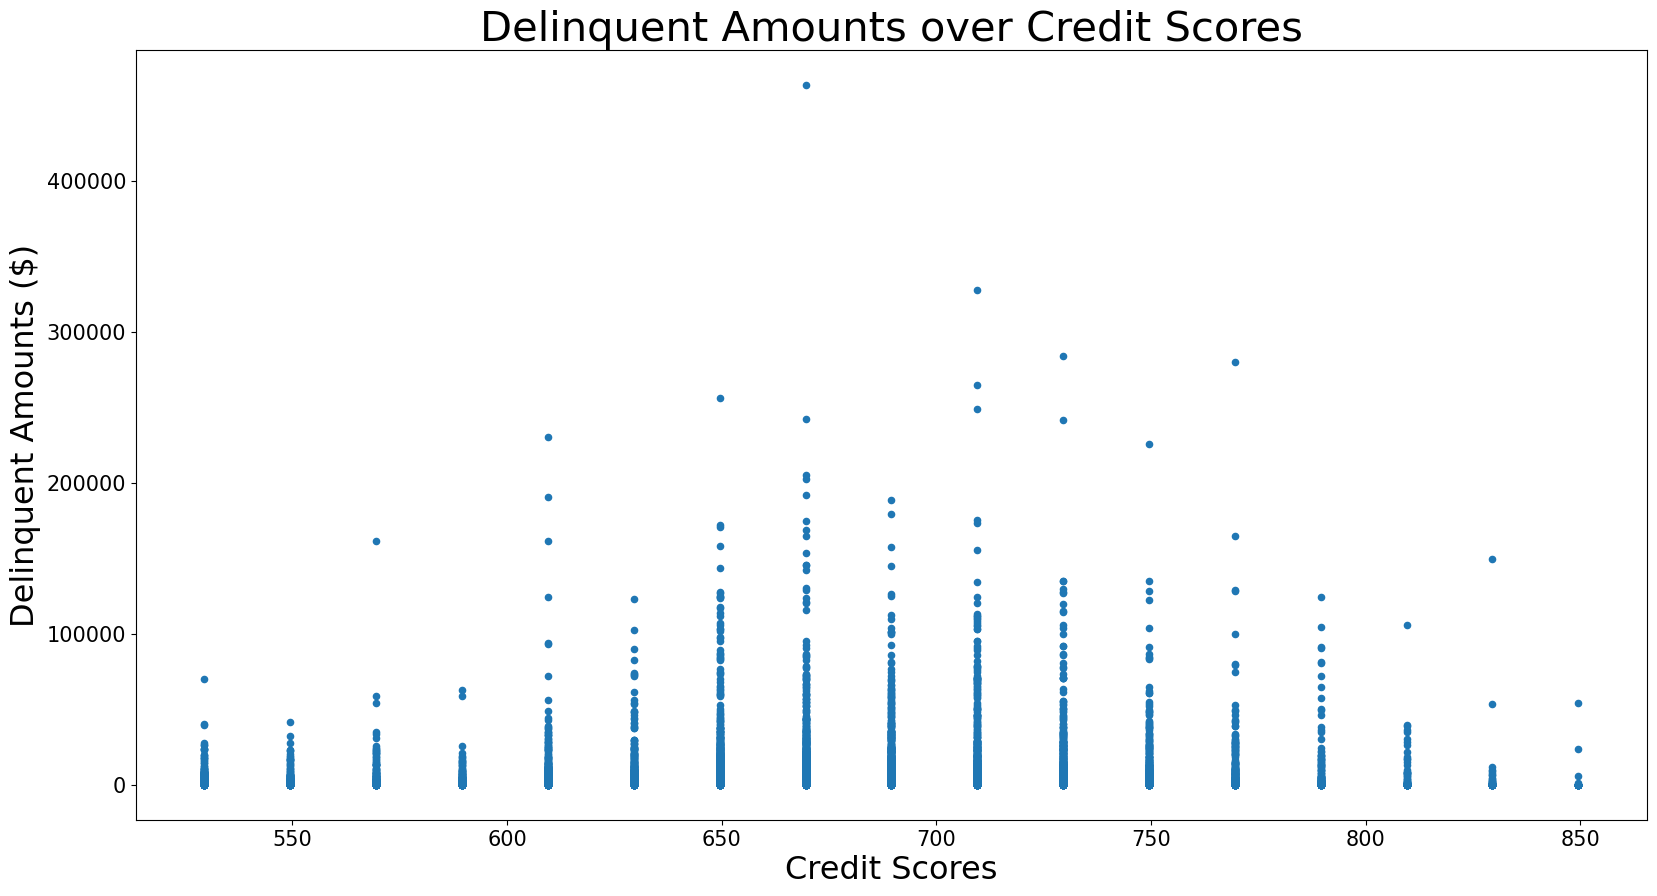

In [22]:
# Code for creating Scatterplot of ALL Credit Scores & ALL Delinquent Amounts

# creates & displays Scatterplot
df_prosper_loan_data.plot(x='CreditScore', y='AmountDelinquent', kind='scatter', figsize=(19.5,10), rot=0, fontsize=15) # ("rot=0" ensures x-axis labels are horizontal, so ALL Labels can be read)

# adds x-axis label to Scatterplot
plt.xlabel('Credit Scores', fontsize=23) # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY X-LABEL SIZE

# adds y-axis label to Scatterplot
plt.ylabel('Delinquent Amounts ($)', fontsize=23) # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY Y-LABEL SIZE

# adds title to Scatterplot
plt.title('Delinquent Amounts over Credit Scores', fontsize=30) # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY TITLE SIZE

## (Visualization 3)



The third visualization is split into _two parts_. _Both parts_ hold facet plots with the **loan status types** and the **yearly incomes**. However, the facet plot of the _first part_ has histograms with the **complete** and **current** loans while the facet plot of the _second part_ has histograms with the loans having the **final payment in progress**, **past due 1 to 15 days**, **past due 16 to 30 days**, **past due 31 to 60 days**, **past due 61 to 90 days**, **past due 91 to 120 days**, and **past due more than 120 days**. The third visualization was split into _two parts_ to show the histograms of the facet plot better. 

The third visualization answers the following question:

_3. Do people with loans that are past due more than 120 days have the lowest credit scores?_

by showing that **_the people with loans that are past due more than 120 days have the credit scores between 650-750. 
They do not tend to have the lowest credit scores, rather they tend to have credit scores around 700_**.

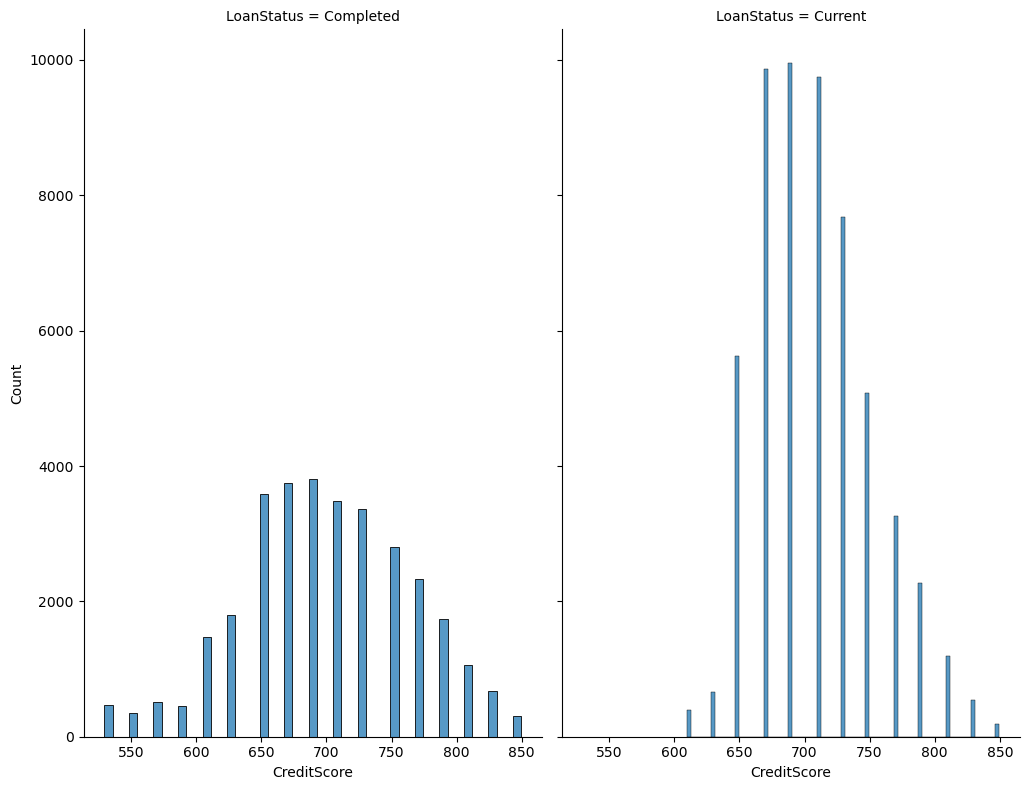

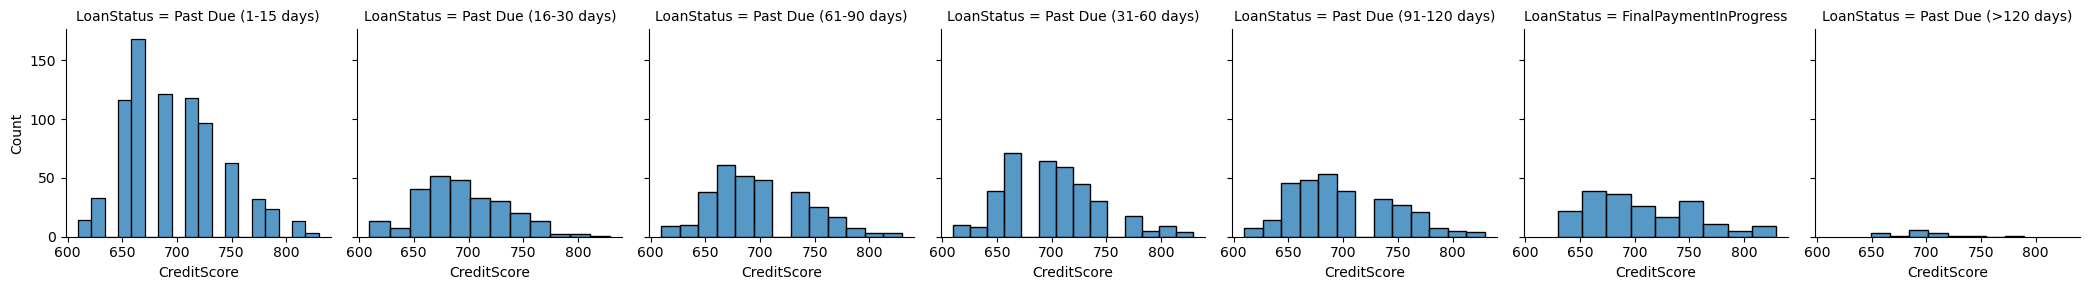

In [9]:
# Code for creating Facet Plot of histograms with Completed & Current Loan Status Types & ALL Yearly Incomes (TO BETTER SHOW Facet Plots for Completed & Current Loans)

# creates dataframe with Completed & Current loans Only
df_prosper_complete_and_current_loans_data = df_prosper_loan_data[df_prosper_loan_data["LoanStatus"].isin(['Completed', 'Current'])]

# creates & displays for Facet Plot of histograms with "Completed" & "Current" Loan Status Types & ALL Credit Scores
g = sns.FacetGrid(df_prosper_complete_and_current_loans_data, col='LoanStatus', height=8, aspect=.65)
g.map(sns.histplot, 'CreditScore')
plt.show()


# Code for creating Facet Plot of histograms with Loan Status Types, "FinalPaymentInProgress", "Past Due (1-15 days)", "Past Due (16-30 days)", "Past Due (31-60 days)", "Past Due (61-90 days)", "Past Due (91-120 days)", and "Past Due (>120 days)", & ALL Yearly Incomes
# (TO BETTER SHOW Facet Plots for Loan Status Types, "FinalPaymentInProgress", "Past Due (1-15 days)", "Past Due (16-30 days)", "Past Due (31-60 days)", "Past Due (61-90 days)", "Past Due (91-120 days)", and "Past Due (>120 days)")

# creates dataframe with Loan Status Types, "FinalPaymentInProgress", "Past Due (1-15 days)", "Past Due (16-30 days)", "Past Due (31-60 days)", "Past Due (61-90 days)", "Past Due (91-120 days)", and "Past Due (>120 days)", ONLY
df_prosper_incomplete_and_past_due_loans_data = df_prosper_loan_data[df_prosper_loan_data["LoanStatus"].isin(['FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'])]

# creates & displays for Facet Plot of histograms with "FinalPaymentInProgress", "Past Due (1-15 days)", "Past Due (16-30 days)", "Past Due (31-60 days)", "Past Due (61-90 days)", "Past Due (91-120 days)", and "Past Due (>120 days)" Loan Status Types & ALL Credit Scores
g = sns.FacetGrid(df_prosper_incomplete_and_past_due_loans_data, col='LoanStatus')
g.map(sns.histplot, 'CreditScore')
plt.show()

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
